In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score




# Load Data

In [2]:
# load the data into a pandas dataframe

data_path = r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Neural Networks\portuguesebankall.csv"
df = pd.read_csv(data_path)

# preview data
df.info()
df.head
print(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        41188 non-null  int64  
 1   JOB        41188 non-null  object 
 2   MARITAL    41188 non-null  object 
 3   EDUCATION  41188 non-null  object 
 4   DEFAULT    41188 non-null  object 
 5   HOUSING    41188 non-null  object 
 6   LOAN       41188 non-null  object 
 7   CONTACT    41188 non-null  object 
 8   MONTH      41188 non-null  object 
 9   DOW        41188 non-null  object 
 10  DURATION   41188 non-null  int64  
 11  CAMPAIGN   41188 non-null  int64  
 12  PDAYS      41188 non-null  int64  
 13  PREVIOUS   41188 non-null  int64  
 14  POUTCOME   41188 non-null  object 
 15  EMPVAR     41188 non-null  float64
 16  CPI        41188 non-null  float64
 17  CCI        41188 non-null  float64
 18  EURIBOR3M  41188 non-null  float64
 19  NREMP      41188 non-null  float64
 20  RESPON

# Preprocess Data


*   Drop unnecessary variables
*   Convert target to numeric




In [3]:
# drop unnecessary columns
df.drop(['DURATION'], axis=1, inplace=True)
# convert response variable to numerical
df['RESPOND'] = df['RESPOND'].apply(lambda x: 1 if x == 'yes' else 0)

df.head()



,AGE,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,DOW,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMPVAR,CPI,CCI,EURIBOR3M,NREMP,RESPOND
0,17,student,single,unknown,no,yes,no,cellular,aug,wed,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,0
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,0
2,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,0
3,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,1
4,17,student,single,unknown,no,no,yes,cellular,oct,tue,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,1


# Split data into training and test sets

Before splitting
*   Separate X and y variables into separate data frames
*   Create dummy variables



In [4]:
# split the data into training and testing sets
X1 = df.drop(['RESPOND'], axis=1)
X1=df[['AGE', 'DEFAULT','HOUSING','LOAN','CONTACT', 'MONTH','DOW','CAMPAIGN','PDAYS','PREVIOUS','POUTCOME','EMPVAR', 'CPI','CCI','EURIBOR3M','NREMP']]
X1 = pd.get_dummies(X1, columns=['DEFAULT','HOUSING','LOAN','CONTACT','MONTH','DOW','POUTCOME'], drop_first=True, dtype='float')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

X = pd.DataFrame(X_scaled, columns=X1.columns)

y = df['RESPOND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()




<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 39075 to 15795
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AGE                   28831 non-null  float64
 1   CAMPAIGN              28831 non-null  float64
 2   PDAYS                 28831 non-null  float64
 3   PREVIOUS              28831 non-null  float64
 4   EMPVAR                28831 non-null  float64
 5   CPI                   28831 non-null  float64
 6   CCI                   28831 non-null  float64
 7   EURIBOR3M             28831 non-null  float64
 8   NREMP                 28831 non-null  float64
 9   DEFAULT_unknown       28831 non-null  float64
 10  DEFAULT_yes           28831 non-null  float64
 11  HOUSING_unknown       28831 non-null  float64
 12  HOUSING_yes           28831 non-null  float64
 13  LOAN_unknown          28831 non-null  float64
 14  LOAN_yes              28831 non-null  float64
 15  CONTACT_telephone   

# Neural Network

- **input layer** contains 31 features

- **1 hidden layer**  with 5 neurons and tanh activation function

- **output layer** contains 1 output and sigmoid activation function to scale prediction between 0 and 1

- **optimizer** using Adam which is the method that is generally recommended as giving the best performance

In [9]:
# Define the model
model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(31,)))  # Hidden layer with 5 units input shape should be the number of x inputs
model.add(Dense(1, activation='sigmoid', input_shape=(5,)))  # Output layer with 1 neuron (binary classification)


# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)






Epoch 1/50


c:\Users\trush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7522 - loss: 0.5175
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.8967 - loss: 0.2863
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.8993 - loss: 0.2781
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.8996 - loss: 0.2738
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8979 - loss: 0.2825
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.8999 - loss: 0.2759
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8983 - loss: 0.2746
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8990 - loss: 0.2751
Epoch 9/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.8996 - loss: 0.2759
Epoch 10/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.8993 - loss: 0.2705
Epoch 11/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.8985 - loss: 0.2724
Epoch 12/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

# Make Predictions on the training and test data

In [6]:
# make predictions on the training and test data
y_pred_probs_train = model.predict(X_train)  # Get probability scores

print(y_pred_probs_train)
y_pred_train = (y_pred_probs_train > 0.5).astype(int)  # Convert to binary predictions

y_pred_probs_test = model.predict(X_test)  # Get probability scores
y_pred_test = (y_pred_probs_test > 0.5).astype(int)  # Convert to binary predictions


y_prob_train = y_pred_probs_train
y_prob_test = y_pred_probs_test



901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step
[[0.0769538 ]
 [0.02374917]
 [0.04851455]
 ...
 [0.11721996]
 [0.06485903]
 [0.04722901]]
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


## Assess Model on Training and Test data

In [10]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9023
Precision: 0.6743
Recall.  : 0.2396

 -- test set -- 
Accuracy : 0.8970
Precision: 0.6571
Recall.  : 0.2244


#Generate a confusion matrix for the training and test data

In [11]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[25245  2444]
 [  372   770]]
[[10764  1106]
 [  167   320]]


#Generate ROC curves for training and test data

In [12]:
# Convert response from an integer to a categorical variable to generate ROC curve
y_train = y_train.astype('category')
y_test = y_test.astype('category')

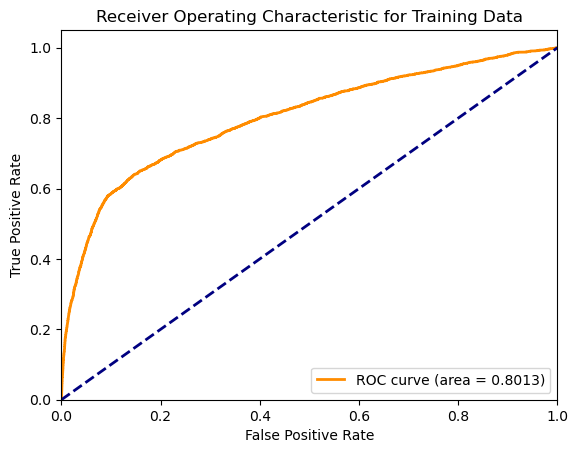

In [13]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train)
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

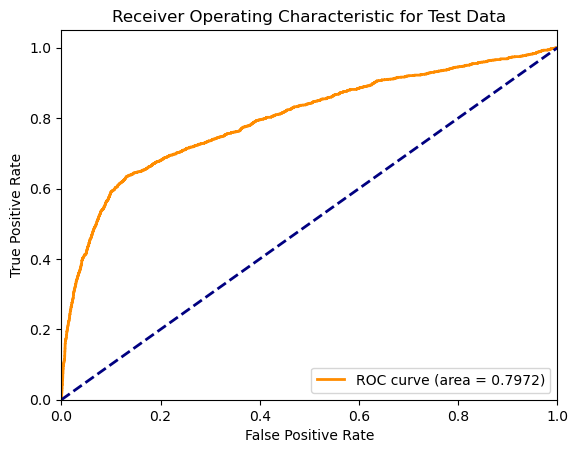

In [14]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test)
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()
